In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from matplotlib import pyplot as plt
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1234)


### Data Preprocessing

In [2]:
df = pd.read_csv('parkinsons.data') ## importing the file and storing into the dataframe 'df'

In [3]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
df_status = df[['status']] 
df_status = df_status.to_numpy()

In [5]:
df = df.drop('name',axis = 1)

In [6]:
df = df.drop('status',axis = 1) #Droppping the target variable from the main dataset

In [7]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [8]:
df_status.shape

(195, 1)

In [9]:
df_scaled.shape

(195, 22)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_status, test_size=0.2,random_state = 21, stratify = df_status)

### Depp Neural Net model

In [11]:
adam = keras.optimizers.Adam(learning_rate = 0.005)

In [12]:

model = Sequential()

model.add(Dense(100, input_dim=22, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(75, activation='relu'))


model.add(Dropout(0.5))

model.add(Dense(25, activation='relu'))


model.add(Dense(1, activation='sigmoid'))



In [13]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping


earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=50, batch_size=25, callbacks=callback)

Epoch 1/50
7/7 [==============================] - 0s 20ms/step - loss: 0.8035 - accuracy: 0.5769 - val_loss: 0.5336 - val_accuracy: 0.7436
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7564 - val_loss: 0.3929 - val_accuracy: 0.8718
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8077 - val_loss: 0.3148 - val_accuracy: 0.8718
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.7692 - val_loss: 0.2975 - val_accuracy: 0.8718
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8205 - val_loss: 0.3235 - val_accuracy: 0.8718
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8718 - val_loss: 0.3379 - val_accuracy: 0.8718
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8654 - val_loss: 0.2934 - val_accuracy: 0.8718
Epoch 8/50
7/7 [=================

In [15]:
score = model.evaluate(X_test, y_test)
print(' loss:', score[0])
print(' accuracy:', score[1])

2/2 [==============================] - 0s 625us/step - loss: 0.1665 - accuracy: 0.9231
 loss: 0.1665443629026413
 accuracy: 0.9230769276618958


In [16]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

#y_pred



### ROC Curve

In [17]:
a = pd.DataFrame(

confusion_matrix(y_test, y_pred),

columns=['Predicted Healthy', 'Predicted Parkinsons'],

index=['True Healthy', 'True Parkinsons']

)

In [18]:
confusion_matrix(y_test, y_pred)

array([[ 7,  3],
       [ 0, 29]], dtype=int64)

### Confusion Matrix

<AxesSubplot:>

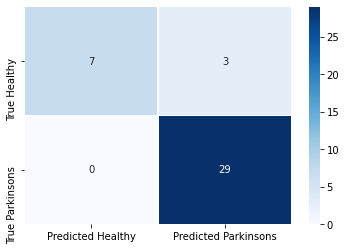

In [19]:
import seaborn as sns


sns.heatmap(a, cmap ='Blues', linewidths = 0.30, annot = True)

<AxesSubplot:>

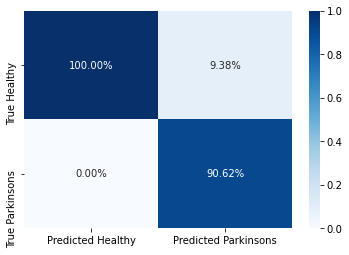

In [20]:
sns.heatmap(a/np.sum(a), annot=True, 
            fmt='.2%', cmap='Blues')

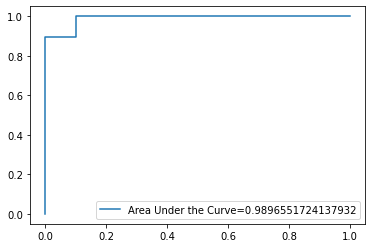

In [21]:
y_pred = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Area Under the Curve="+str(auc))
plt.legend()
plt.show()

In [22]:
y_pred = y_pred > 0.5

In [23]:
print("The F1 Score of the model is",f1_score(y_test,y_pred))

The F1 Score of the model is 0.9508196721311475


In [24]:
print ("The Accuracy of the model is",accuracy_score(y_test,y_pred))

The Accuracy of the model is 0.9230769230769231


In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.906


In [27]:
print('Recall : %.3f' % recall_score(y_test, y_pred))

Recall : 1.000
